<a href="https://colab.research.google.com/github/kowshikaRani/DataMining-Worksheet-1/blob/main/DM_Research_Paper_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Research Paper Implementation



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Importing the necessary libraries


In [ ]:
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import math
from scipy.stats import pearsonr
import scipy.stats 
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 

Reading  the dataset

In [ ]:
# Sonar
Sonar_headerlist=[]
for i in range(0,61):
  elem="f"+str(i+1)
  Sonar_headerlist.append(elem)
Sonar_headerlist[-1]="label"
data_sonar = pd.read_csv('/content/gdrive/My Drive/Sonar.csv', names=Sonar_headerlist )
print("Actual data siza for sonar : ", data_sonar.shape)

# Splitting sonar into test and train
X=data_sonar[data_sonar.columns[0:-1]]
y=data_sonar.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test]
x_train = np.array(X_train)
Y_train = np.array(y_train)
x_train = np.transpose(x_train)
Y_train = np.transpose(Y_train)
x_train = list(x_train)
Y_train = list(Y_train)
data_sonar = x_train
data_sonar.append(Y_train)
data_sonar = np.array(data_sonar)
data_sonar = np.transpose(data_sonar)
data_sonar = list(data_sonar)
data_sonar = pd.DataFrame(data_sonar, columns=Sonar_headerlist)

print("Sonar data : \n", data_sonar)

# Isolet
Isolet_headerlist=[]
for i in range(0,618):
  elem="f"+str(i+1)
  Isolet_headerlist.append(elem)
Isolet_headerlist[-1]="label"
data_isolet = pd.read_csv('/content/gdrive/My Drive/isolet_test.csv', names=Isolet_headerlist )
Data_isolets = data_isolet
print("Isolet data : \n", data_isolet)

# SPECTF
spectf_headerlist=[]
for i in range(0,45):
  elem="f"+str(i+1)
  spectf_headerlist.append(elem)
spectf_headerlist[-1]="label"
data_spectf = pd.read_csv('/content/gdrive/My Drive/SPECTF_train.csv', names=spectf_headerlist )
Data_spectfs = data_spectf
print("SPECTF data : \n", data_spectf)

Actual data siza for sonar :  (208, 61)
     f1     f2      f3  f4  f5  f6     f7  ...  f9  f10  f11  f12  f13   f14  label
0     1  22.08  11.460   2   4   4  1.585  ...   0    0    1    2  100  1213      0
1     0  22.67   7.000   2   8   4  0.165  ...   0    0    0    2  160     1      0
2     0  29.58   1.750   1   4   4  1.250  ...   0    0    1    2  280     1      0
3     0  21.67  11.500   1   5   3  0.000  ...   1   11    1    2    0     1      1
4     1  20.17   8.170   2   6   4  1.960  ...   1   14    0    2   60   159      1
..   ..    ...     ...  ..  ..  ..    ...  ...  ..  ...  ...  ...  ...   ...    ...
685   1  31.57  10.500   2  14   4  6.500  ...   0    0    0    2    0     1      1
686   1  20.67   0.415   2   8   4  0.125  ...   0    0    0    2    0    45      0
687   0  18.83   9.540   2   6   4  0.085  ...   0    0    0    2  100     1      1
688   0  27.42  14.500   2  14   8  3.085  ...   1    1    0    2  120    12      1
689   1  41.00   0.040   2  10   4  


# Calculate the fitness function


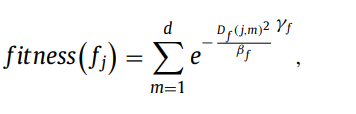

where


*   fj - denotes the jth feature 
   
*    Df feature distance matrix which consists of the pairwise-distances among features.
*    βf is the normalization factor and it is approximated by
the maximum feature distance from Df
*    stabilization parameter γ f controls the shape of the cluster and can be estimated from the data by means of the Correlation Comparison Algorithm (CCA). 



Specifically, γf starts with an initial value and iteratively increases by a constant step size until the increase in γf does not have a significant improvement on the fitness approximation procedure. 
Here , the density distribution of features is estimated
from the data and all possible density peaks are located by following the proposed feature clustering procedure.

Finding the feature distance matrix Df

In [ ]:
# Getting the feature distance matrix
def find_feature_distance_matrix(data) :
  feature_distance_matrix=data.corr()
  print(feature_distance_matrix)
  #heatmap = sns.heatmap(feature_distance_matrix, cbar=True, annot=True, linewidths=1.5)
  #heatmap.set_title("Correlation heatmap\n")
  return feature_distance_matrix

# for sonar
feature_distance_matrix_sonar = find_feature_distance_matrix(data_sonar.iloc[:,:-1].astype(float))

# for Isolet
feature_distance_matrix_isolet = find_feature_distance_matrix(data_isolet)

# for spectf
feature_distance_matrix_spectf = find_feature_distance_matrix(data_spectf)

           f1        f2        f3  ...       f12       f13       f14
f1   1.000000 -0.012099 -0.033794  ... -0.065975  0.060903 -0.021545
f2  -0.012099  1.000000  0.196830  ...  0.032548 -0.076353  0.087667
f3  -0.033794  0.196830  1.000000  ...  0.076795 -0.180630  0.058524
f4  -0.073144  0.139810  0.116124  ... -0.012364 -0.050843  0.058710
f5  -0.021422 -0.111693  0.021952  ...  0.085587  0.068246  0.115491
f6   0.049688  0.014664  0.062260  ...  0.066529  0.065564  0.058425
f7   0.053518  0.347066  0.242261  ... -0.029899 -0.051882  0.136853
f8  -0.032884  0.212152  0.263102  ...  0.047410 -0.094091  0.173484
f9  -0.068754  0.086264  0.161170  ...  0.172204 -0.028106  0.146387
f10 -0.014745  0.183674  0.226160  ...  0.099043 -0.105168  0.104391
f11  0.050038  0.042036  0.025381  ... -0.015769  0.107443 -0.002114
f12 -0.065975  0.032548  0.076795  ...  1.000000 -0.063536  0.060648
f13  0.060903 -0.076353 -0.180630  ... -0.063536  1.000000  0.028414
f14 -0.021545  0.087667  0.058524 

In [ ]:
# Finding beta
# Formula : norm(x-mean(x))/n
def find_beta(data):
  beta = []

  for i in range((len(data)-1)):
    feature = data[i]
    mean = statistics.mean(feature)
    norm = np.linalg.norm(data[i] - mean)
    b_f = (norm*norm)/len(data[i])
    beta.append(b_f)
  print(beta)
  return beta

# for sonar
data_sonar = data_sonar.iloc[:,:-1].astype(float)
data_sonar = np.array(data_sonar)
data_sonar = np.transpose(data_sonar)
beta_sonar = find_beta(data_sonar)

# for isolet
data_isolet = np.array(data_isolet)
data_isolet = np.transpose(data_isolet)
beta_isolet = find_beta(data_isolet)

# for SPECTF
data_spectf = np.array(data_spectf)
data_spectf = np.transpose(data_spectf)
beta_spectf = find_beta(data_spectf)

[0.2242540368384278, 139.60091242964737, 24.25785464766877, 0.1989206520667499, 13.236114861823744, 3.999571347127383, 9.051607792266244, 0.24933022988653564, 0.24296902125689607, 24.94487095405269, 0.24801855209632687, 0.09144023078670659, 31109.6707002902]
[0.047162460733756, 0.09661961986092461, 0.11045262538047404, 0.09481282930471789, 0.19796338324478163, 0.31468359230581927, 0.3125846502587102, 0.2842123501607131, 0.27997121337950803, 0.2710320751294578, 0.23865860783303383, 0.20617654200965158, 0.21168140982282935, 0.23679437598161027, 0.23195954041742356, 0.22507860891374173, 0.19815955758903694, 0.17285567512814126, 0.1504333481799199, 0.13929176534040794, 0.1459641840674665, 0.15597119320901506, 0.1690381467269071, 0.171157201975576, 0.15848136266475646, 0.14811740382161392, 0.14244001314271534, 0.1410822425455702, 0.14289300411535005, 0.15365749632912995, 0.18190667426692908, 0.21575814905095742, 0.039451698927150634, 0.07650922768426498, 0.10100433999449493, 0.0849737808391

Correlation Comparison Algorithm (CCA)


*  STEP 1:  Set m =1 and initialze epsilon
*  STEP 2:  Calculate the correlation of the values for gamma_m and gamma_m+1
*   STEP 3: IF the correlation is greater than or equal to the
specified epsilon,
THEN choose gamma_m to be the estimate of gamma;
ELSE m =m + 1 and GOTO Step 2










In [ ]:
# Finding fitness function along CCA to find perfect Gamma

# Parameters of fitness function
epsilon = 0.25 # thershold value 
gamma_pairs = [[1,5],[5,10],[10,12],[12,15],[15,20]]

def fitness_function(j, gamma, data, feature_distance_matrix, beta):
  fitness_value = 0
  value = []
  for m in range(0, (len(data)-1)):
    val = feature_distance_matrix[j][m] * feature_distance_matrix[j][m]
    value = math.pow(val, gamma)
    fitness_value += math.exp(-(value/beta[m]))
  return fitness_value

# If gamma is large, each point will be considered as a single cluster
# If gamma is small, all points will be in a single cluster
# Since it has to be optimum, we will be stopping after finding the gamma where the correlation is greater than epsilon
def choosing_gamma(data, feature_distance_matrix, beta):
  gamma = 0
  for gamma1,gamma2 in gamma_pairs:
    f1 = list()
    f2 = list()
    for i in range(0, (len(data)-1)):
      t1 = fitness_function(i, gamma1, data, feature_distance_matrix, beta)
      t2 = fitness_function(i, gamma2, data, feature_distance_matrix, beta)
      f1.append(t1)
      f2.append(t2)
    corr, _ = pearsonr(f1, f2)
    if corr >= epsilon:
      gamma = gamma1
      return gamma
  # to be done :
  # find max of corr and use that gamma1 when no value is greater than epsilon
  return gamma

def find_fitness(data, feature_distance_matrix, beta):
  feature_distance_matrix = np.array(feature_distance_matrix)
  fitness = list()
  #def find_fitness_value():
  gamma = choosing_gamma(data, feature_distance_matrix, beta)
  for i in range(0,(len(data)-1)):
    fitness.append(fitness_function(i, gamma, data, feature_distance_matrix, beta))
  print(fitness)
  return fitness

# for sonar
fitness_sonar = find_fitness(data_sonar, feature_distance_matrix_sonar, beta_sonar)

# for isolet
fitness_isolet = find_fitness(data_isolet, feature_distance_matrix_isolet, beta_isolet)

# for SPECTF
fitness_spectf = find_fitness(data_spectf, feature_distance_matrix_spectf, beta_spectf)

[11.903883331662273, 12.667514127878674, 12.470323938143165, 11.749249932731928, 12.337274292978838, 12.437167124212186, 12.148871049552648, 11.20369356181748, 10.969099766515603, 11.556825674523994, 11.90080715909399, 11.852753340169414, 12.840304311556961]
[485.63891554458905, 454.9922158595331, 450.038026896823, 535.9463493026315, 445.9556622039595, 385.83109083260143, 400.1832737570287, 410.4533395142477, 417.185353045261, 425.3174271484473, 433.5425303998707, 441.54339692562615, 455.9422840915096, 475.07777266544326, 500.59921326651715, 518.478515337052, 527.4168393389373, 526.0200005561115, 512.3062160327057, 496.52225226671334, 475.8745391651901, 459.4062953433629, 453.65966348155973, 454.0393740707462, 459.31212693643704, 468.47857653050824, 475.4962645714797, 478.7523234837372, 482.7118710017418, 486.4743604416231, 491.3123603703591, 497.9970841142465, 490.1182113593717, 460.916124440473, 444.3988026639695, 525.4193021892232, 438.43118410312917, 375.3117750661379, 381.59289246

In [ ]:
# Having the fitness value in dict
def convert_to_dict(fitness):
  keys = [i for i in range(0, len(fitness)-1)]
  fitness_dict = dict()
  for i in keys:
    fitness_dict[i]=fitness[i]
  print(fitness_dict)#tpc
  return fitness_dict

# for sonar
sonar_fitness_dict = convert_to_dict(fitness_sonar)

# for isolet
isolet_fitness_dict = convert_to_dict(fitness_isolet)

# for spectf
spectf_fitness_dict = convert_to_dict(fitness_spectf)

{0: 11.903883331662273, 1: 12.667514127878674, 2: 12.470323938143165, 3: 11.749249932731928, 4: 12.337274292978838, 5: 12.437167124212186, 6: 12.148871049552648, 7: 11.20369356181748, 8: 10.969099766515603, 9: 11.556825674523994, 10: 11.90080715909399, 11: 11.852753340169414}
{0: 485.63891554458905, 1: 454.9922158595331, 2: 450.038026896823, 3: 535.9463493026315, 4: 445.9556622039595, 5: 385.83109083260143, 6: 400.1832737570287, 7: 410.4533395142477, 8: 417.185353045261, 9: 425.3174271484473, 10: 433.5425303998707, 11: 441.54339692562615, 12: 455.9422840915096, 13: 475.07777266544326, 14: 500.59921326651715, 15: 518.478515337052, 16: 527.4168393389373, 17: 526.0200005561115, 18: 512.3062160327057, 19: 496.52225226671334, 20: 475.8745391651901, 21: 459.4062953433629, 22: 453.65966348155973, 23: 454.0393740707462, 24: 459.31212693643704, 25: 468.47857653050824, 26: 475.4962645714797, 27: 478.7523234837372, 28: 482.7118710017418, 29: 486.4743604416231, 30: 491.3123603703591, 31: 497.99708

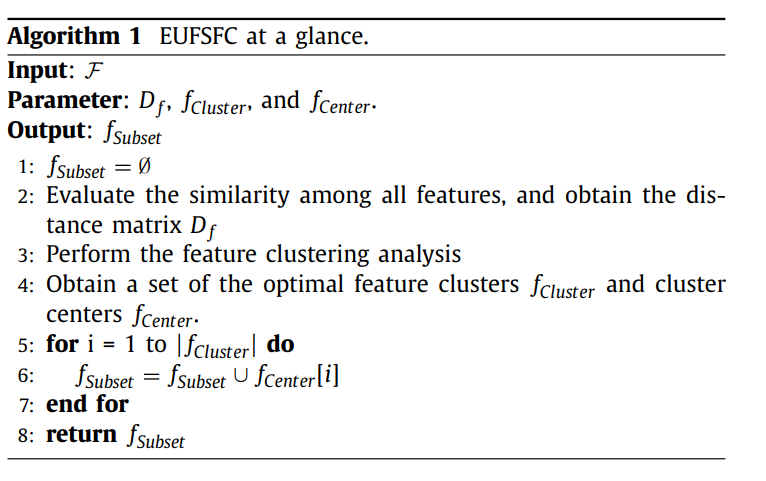

In [ ]:
# To get the set of TPCs
def find_feature_centers(fitness, fitness_dict):
  print("Total number of features in the dataset:",len(fitness))
  fit_set = set(int(i) for i in fitness)
  tpc=list()#density max
  #tpc_neighours=dict()
  fit_set=list(fit_set)
  for i in range(len(fit_set)):
    #temp=list()
    max_key=-1
    max_val=fit_set[i]
    val=fit_set[i]
    for key,value in fitness_dict.items():
      if int(value)==val :
        #temp.append(key)
        if value > max_val:
          max_val=value
          max_key=key
    #tpc_neighours[max_key]=temp
    tpc.append(max_key)
  print("feature centers:",tpc)
  print("Thus the number of feature centers are:",len(tpc))
  print()
  return tpc

# for sonar
tpc_sonar = find_feature_centers(fitness_sonar, sonar_fitness_dict)

# for isolet
tpc_isolet = find_feature_centers(fitness_isolet, isolet_fitness_dict)

# for spectf
tpc_spectf = find_feature_centers(fitness_spectf, spectf_fitness_dict)

Total number of features in the dataset: 13
feature centers: [8, 0, 1]
Thus the number of feature centers are: 3

Total number of features in the dataset: 617
feature centers: [283, 249, 586, 275, 80, 177, 442, 50, 251, 419, 421, 244, 438, 35, 211, 163, 113, 555, 274, 596, 530, 499, 3, 560, 370, 491, 584, 408, 523, 272, 426, 613, 594, 472, 612, 380, 447, 493, 375, 241, 443, 332, 364, 609, 474, 528, 327, 368, 496, 378, 495, 476, 434, 436, 351, 377, 475, 348, 606, 320, 497, 602, 604, 343, 346, 345, 330, 367, 333, 366, 427, 471, 293, 101, 470, 104, 461, 103, 73, 106, 134, 133, 294, 135, 460, 37, 107, 75, 137, 295, 38, 459, 138, 5, 458, 549, 261, 514, 41, 454, 453, 468, 42, 172, 298, 6, 171, 43, 141, 516, 170, 299, 292, 169, 466, 44, 68, 465, 517, 263, 464, 396, 9, 394, 462, 142, 311, 301, 45, 174, 150, 110, 574, 88, 542, 196, 153, 11, 56, 89, 55, 4, 314, 228, 90, 569, 215, 267, 570, 22, 1, 309, 156, 234, 125, 181, 33, 417, 540, 188, 520, 143, 94, 258, 126, 268, 505, 506, 206, 20, 84, 127,

Calculation of MICI(Maximal Information Compression Index)

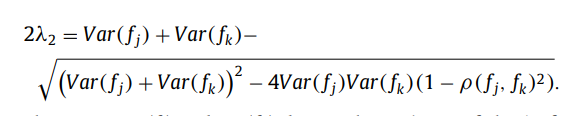

Normalized MICI:

Normalized MICI
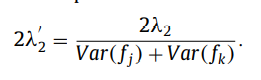

In [ ]:
#Calculate MICI (Maximal Information Compression Index),as the features are continuous
#mici'=mici/(var(f1)+var(f2))
#mici=variance(f1)+var(f2)-sqrt((var(f1)+var(f2)**2)− 4Var(fj)Var(fk )(1 − ρ(fj, fk )**2))
#ρ=correlation

def find_mici(data, tpc):
  variance=[]
  for feature in range(len(data)-1):
    variance.append(statistics.variance(data[feature]))
  #print(variance)
  #find MICI and normalized MICI
  MICI=[] #a len(tpc)Xlen(feature) matrix
  normalized_MICI = list() #a len(tpc)Xlen(feature) matrix
  for j in tpc:
    mici=[]
    n_mici = []
    for k in range(len(variance)):
      val1 = variance[j] + variance[k]
      val2 = math.pow(val1, 2)
      val3 = 4 * variance[j] * variance[k] * (1 - pow(scipy.stats.spearmanr(data[j], data[k]).correlation, 2))
      sqrt = math.sqrt(val2 -val3)
      mici_val = val1 - sqrt
      mici.append(mici_val)
      n_mici_val = mici_val/(variance[j] * variance[k])
      n_mici.append(n_mici_val)
    MICI.append(mici)
    normalized_MICI.append(n_mici)
  #print(normalized_MICI)
  return normalized_MICI

# for sonar
mici_sonar = find_mici(data_sonar, tpc_sonar)
print("Sonar : \n", mici_sonar)

# for isolet
mici_isolet = find_mici(data_isolet, tpc_isolet)
t_mici_isolet = pd.DataFrame(mici_isolet)
print("Isolet head : \n", t_mici_isolet.head())
print("Isolet shape : \n", t_mici_isolet.shape)

Sonar : 
 [[7.876727385446387, 0.014209200159217244, 0.08042951356327446, 7.153760067973256, 0.14440848371954831, 0.49604362211067554, 0.20179109808576792, 4.472620986122785, 0.0, 0.0070210366342354094, 7.814627119016499, 7.8177850374880835, 6.376728399469709e-05], [0.0, 0.014272544678929789, 0.08210946358102211, 8.583767177879352, 0.15066352152763435, 0.4968599078948447, 0.2200266038939572, 7.925801700619704, 7.876727385446387, 0.07968848580221415, 7.872664965099023, 8.832139833659834, 6.320272376552365e-05], [0.014272544678929789, 0.0, 0.014079702562815585, 0.014091118518870098, 0.014214790712170645, 0.014151902128883408, 0.013432155742531414, 0.013618258672780421, 0.014209200159217244, 0.0139690219595102, 0.014170027411662282, 0.014293352499900748, 6.410771955454514e-05]]


KeyboardInterrupt: ignored

In [ ]:
# Calculate SU (Symmetrical Uncertainity) -> for discrete features in the dataset
# su = 2*Gain(Fj|Fk) / H(Fj) + H(Fk)
# Gain(fj| fk ) = H(fj) − H(fj| fk ) = H(fk ) − H(fk| fj)
# H(f j | f k ) = − P (f k )  P (f j | f k ) log 2 P (f j | f k )
# H(f j ) =  P (f j ) log P (f j )
##Entropy

def entropy(Y):
    unique, count = np.unique(Y, return_counts=True, axis=0)
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log2(prob))
    return en

#Joint Entropy
def jEntropy(Y,X):
    # H(Y;X)
    YX = np.c_[Y,X]
    return entropy(YX)

#Conditional Entropy
def cEntropy(Y, X):
    # conditional entropy = Joint Entropy - Entropy of X
    # H(Y|X) = H(Y;X) - H(X)
    return jEntropy(Y, X) - entropy(X)

#Information Gain
def gain(Y, X):
    # Information Gain, I(Y;X) = H(Y) - H(Y|X)
    return entropy(Y) - cEntropy(Y,X)

def calculate_SU(data, tpc):
  SU = []
  for i in tpc:
    for j in range(0,(len(data)-1)):
      info_gain = gain(data[i], data[j])
      su = (2 * info_gain) / (entropy(data[i]) + entropy(data[j]))
      SU.append(su)
  print(SU)
  return SU

# for spectf
mici_spectf = list()
mici_spectf.append(calculate_SU(data_spectf, tpc_spectf))
print("Spectf : \n", mici_spectf)

[0.6429017919627144, 0.688160657343225, 0.6512888581724817, 0.6432533478772429, 0.6641453195540244, 0.6536561958004696, 0.5991878565379615, 0.6230089571661607, 0.6261910312697995, 0.6667972165179379, 0.6363187938758416, 0.6630990208388552, 0.6483965560531066, 0.6446610663535793, 0.6453575788746077, 0.6819623623243125, 0.6373219604301281, 0.6346714970573597, 0.6698695220901062, 0.6755955201761855, 0.6201799509310958, 0.6369785627800185, 0.6719910964457443, 0.6702751953533466, 0.712183149357724, 1.0, 0.6685111726630022, 0.6988925446522838, 0.6371347151270381, 0.667598999912664, 0.5852251106515121, 0.5789277907985916, 0.5751301302490057, 0.6238440781687598, 0.6006065003308126, 0.617668097953023, 0.6561589398751411, 0.6671031228912052, 0.6531363471387618, 0.6751530284096428, 0.6892725058015885, 0.6830396015593224, 0.6845232827679949, 0.7045599496149352]
Spectf : 
 [[0.6429017919627144, 0.688160657343225, 0.6512888581724817, 0.6432533478772429, 0.6641453195540244, 0.6536561958004696, 0.5991

In [ ]:
# Clustering using MICI and SU

def form_clusters(tpc, normalized_MICI):
  clusters = {clusterelements: [] for clusterelements in tpc}

  for i in range(len(normalized_MICI[0])):
    max = -1
    max_f = -1
    if i not in tpc:
      for j in range(len(normalized_MICI)):
        if normalized_MICI[j][i] > max:
          max = normalized_MICI[j][i]
          max_f = j
      clusters[tpc[max_f]].append(i)
  print(clusters)
  return clusters

# for sonar
sonar_clusters = form_clusters(tpc_sonar, mici_sonar)

# for isolet
isolet_clusters = form_clusters(tpc_isolet, mici_isolet)

# for spectf
spectf_clusters = form_clusters(tpc_spectf, mici_spectf)

{8: [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], 0: [], 1: []}


NameError: ignored

In [ ]:
# Creating Pseudo fetures using Gaussian Function
# Gaussian distribution is normal distribution
# Formula for Gaussian Distribution : np.random.normal(mu, sigma, 1000)

def form_pseudo_features(data, tpc):
  pseudo_features = []
  cluster_index = []
  for i in range(0, (len(tpc)-1)):
    for j in range(i+1,len(tpc)):
      pseudo_f = []
      for k in range(0, len(data[0])):
        lists = [data[tpc[i]][k], data[tpc[j]][k]]
        mean = statistics.mean(lists)
        std_dev = statistics.stdev(lists)
        pseudo_f.append(np.random.normal(mean, std_dev, 1)[0])
      pseudo_features.append(pseudo_f)
      temp = list()
      temp.append(i)
      temp.append(j)
      cluster_index.append(temp)

  print("The number of pseudo_features formed are ",len(pseudo_features))
  print(pseudo_features)
  print(cluster_index)
  return pseudo_features, cluster_index

# for sonar
sonar_pseudo_features, sonar_cluster_index = form_pseudo_features(data_sonar, tpc_sonar)

# for isolet
#isolet_pseudo_features, isolet_cluster_index = form_pseudo_features(data_isolet, tpc_isolet)


The number of pseudo_features formed are  3
[[0.0, 1.3970042435393943, 0.6628574251140265, 0.9408602562943518, 0.0, 1.0, 1.3029691067310583, 0.0, 1.0, 0.24284830295048615, 0.0, 0.0, 0.0, 0.0, 0.6773030294226058, 1.0, -1.0511750617667912, 0.0, 0.12827324019615916, 0.9591651232831502, -0.5536732859954099, -0.25638352179293755, 0.014155916124851842, -0.7431187336431146, 0.046515067325499204, 1.0, 0.0, 0.5469697067865397, 0.0, 0.6751434996447807, 1.0, 0.23825377279861154, 0.4921463865252666, 1.5884595760129148, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9334598257949037, 0.0, 0.0, 0.0, 0.0, 1.083537594031659, 0.0, 0.05770232653077789, 1.7192748001588978, -0.954439408547799, 0.529421601250372, 0.7151334758302785, -0.03651823158368128, 0.6567107629111708, -0.6306018959131041, 1.0, 0.11286881788736008, 0.8198836622359924, 1.0, 1.0, 0.7971252734893075, 0.8782051867408355, 0.0, -0.8077156259123968, 1.0, -0.630768665169924, 0.3663277417957128, 0.22391077585996577, 0.0, 0.0, 1.0, -0.776313028

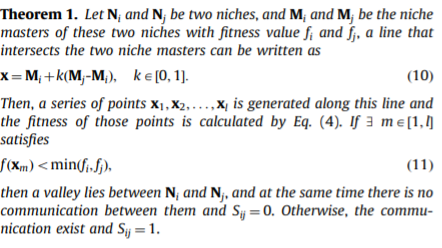

For noise tolerance :

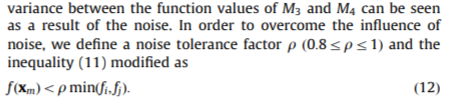

In [ ]:
# To find the Valleys
# f(xm) < rho * min(Fi, Fj) -> xm is the pseudo feature 
# 0.8 <= rho <= 1
# Reference : https://www.sciencedirect.com/science/article/abs/pii/S0031320309004233

def pseudo_fitness_value(mat, j, gamma,bf):
  fitness_value = 0
  value = []
  for m in range(0, len(mat)):
    value = math.pow((mat[j][m] * mat[j][m]), gamma)
    fitness_value += math.exp(-(value/bf))
  return fitness_value

def pseudo_gamma(mat,bf):
  gamma = 0
  for gamma1,gamma2 in gamma_pairs:
    f1 = list()
    f2 = list()
    #print("gammas=",gamma1,gamma2)
    for i in range(0, len(mat)):
      t1 = pseudo_fitness_value(mat, i, gamma1, bf)
      t2 = pseudo_fitness_value(mat, i, gamma2, bf)
      #print("t1 t2\n",t1,t2)
      f1.append(t1)
      f2.append(t2)
    corr, _ = pearsonr(f1, f2)
    print("Corr = ",corr)
    if corr >= epsilon:
      gamma = gamma1
      return gamma
  # to be done :
  # find max of corr and use that gamma1 when no value is greater than epsilon
  return gamma

# Finding beta
# Formula : norm(x-mean(x))/n
#norm is sqrt(sum(xi**2))

def find_pseudo_fitness_function(data, tpc, pseudo_features, cluster_index):
  pseudo_beta = []
  pseudo_fitness = list()

  for i in range(0,len(pseudo_features)):
    # To find the corr matrix
    temp_mat = list()
    
    temp_mat.append(pseudo_features[i])
    temp_mat.append(list(data[tpc[cluster_index[i][0]]]))
    temp_mat.append(list(data[tpc[cluster_index[i][1]]]))
    
    temp_mat = np.array(temp_mat)
    temp_mat = temp_mat.transpose()
    temp_mat = pd.DataFrame(temp_mat)
    corr_mat = temp_mat.corr()
    print(corr_mat)

    feature = pseudo_features[i]
    mean = statistics.mean(feature)
    norm = np.linalg.norm(pseudo_features[i] - mean)
    b_f = (norm*norm)/len(pseudo_features[i])
    pseudo_beta.append(b_f)

    # Fitness function
    gamma = pseudo_gamma(corr_mat,b_f)
    val = pseudo_fitness_value(corr_mat, 0, gamma,b_f)
    pseudo_fitness.append(val)

  print(pseudo_fitness)
  return pseudo_fitness

# for sonar
pseudo_fitness_sonar = find_pseudo_fitness_function(data_sonar, tpc_sonar, sonar_pseudo_features, sonar_cluster_index)

# for isolet
# pseudo_fitness_isolet = find_pseudo_fitness_function(data_isolet, tpc_isolet, isolet_pseudo_features, isolet_cluster_index)

          0         1         2
0  1.000000  0.385634  0.343859
1  0.385634  1.000000 -0.068754
2  0.343859 -0.068754  1.000000
Corr =  0.8472924845455084
          0         1         2
0  1.000000  0.021775  0.173103
1  0.021775  1.000000  0.086264
2  0.173103  0.086264  1.000000
Corr =  0.9743075329114127
          0         1         2
0  1.000000  0.006848  0.151637
1  0.006848  1.000000 -0.012099
2  0.151637 -0.012099  1.000000
Corr =  0.999992917188131
[1.4846724408281546, 2.997985237971749, 2.9984399797846146]


In [ ]:
# To find the Valleys
# f(xm) < rho * min(Fi, Fj) -> xm is the pseudo feature
# If the above condition is satisfied, then valley exists and the neighbouring TPCs cannot be merged.
# 0.8 <= rho <= 1

def check_for_valley(pseudo_features, pseudo_fitness, fitness_dict, tpc, cluster_index):
  rho = 1
  valley = [False]*len(pseudo_features)
  for i in range(0, len(pseudo_features)):
    fit_val1 = fitness_dict[tpc[cluster_index[i][0]]]
    fit_val2 = fitness_dict[tpc[cluster_index[i][1]]]
    val = rho * min(fit_val1, fit_val2)
    
    if pseudo_fitness[i] < val:
      valley[i] = True
  print(valley)
  return valley
  
# for sonar
valley_sonar = check_for_valley(sonar_pseudo_features, pseudo_fitness_sonar, sonar_fitness_dict, tpc_sonar, sonar_cluster_index)

# for isolet
# valley_isolet = check_for_valley(isolet_pseudo_features, isolet_fitness_sonar, isolet_fitness_dict, tpc_isolet, isolet_cluster_index)

[True, True, True]


In [ ]:
# Merging clusters if valley does not exists
def merging_clusters(clusters, tpc, cluster_index, fitness_dict, valley):
  for i in range(0,len(valley)):
    if not valley[i]:
      fit_val1 = fitness_dict[tpc[cluster_index[i][0]]]
      fit_val2 = fitness_dict[tpc[cluster_index[i][1]]]
      if fit_val1>=fit_val2:
        temp=clusters[tpc[cluster_index[i][1]]]
        clusters[tpc[cluster_index[i][0]]].append(temp)
        clusters[tpc[cluster_index[i][0]]].append(tpc[cluster_index[i][1]])
        clusters.pop(tpc[cluster_index[i][1]])
      else:
        temp=clusters[tpc[cluster_index[i][0]]]
        clusters[tpc[cluster_index[i][1]]].append(temp)
        clusters[tpc[cluster_index[i][1]]].append(tpc[cluster_index[i][0]])
        clusters.pop(tpc[cluster_index[i][0]])
  print(clusters)
  print(len(clusters))
  return clusters

def get_optimal_feature_subset(clusters):
  return clusters.keys()

# for sonar
final_cluster_sonar = merging_clusters(sonar_clusters, tpc_sonar, sonar_cluster_index, sonar_fitness_dict, valley_sonar)
optimal_feature_subset_sonar = get_optimal_feature_subset(final_cluster_sonar)
print(optimal_feature_subset_sonar)

# for isolet
# final_cluster_isolet = merging_clusters(isolet_clusters, tpc_isolet, isolet_cluster_index, isolet_fitness_dict, valley_isolet)
optimal_feature_subset_isolet = get_optimal_feature_subset(isolet_clusters)
print(optimal_feature_subset_isolet)

# for spectf
# final_cluster_spectf = merging_clusters(spectf_clusters, tpc_spectf, spectf_cluster_index, spectf_fitness_dict, valley_spectf)
optimal_feature_subset_spectf = get_optimal_feature_subset(spectf_clusters)
print(optimal_feature_subset_spectf)

# ----- End of main code ----------

{8: [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], 0: [], 1: []}
3
dict_keys([8, 0, 1])


NameError: ignored

Experimental Results and Performance Evaluation

In [ ]:
# Getting the test and train for isolet and spectf
Isolet_headerlist=[]
for i in range(0,618):
  elem="f"+str(i+1)
  Isolet_headerlist.append(elem)
Isolet_headerlist[-1]="label"
data_isolet_test = pd.read_csv('/content/gdrive/My Drive/isolet_test.csv', names=Isolet_headerlist )

isolet_X_train = Data_isolets[Data_isolets.columns[0:-1]]
isolet_X_test = data_isolet_test[data_isolet_test.columns[0:-1]]
isolet_y_train = Data_isolets.label
isolet_y_test = data_isolet_test.label

# SPECTF
spectf_headerlist=[]
for i in range(0,45):
  elem="f"+str(i+1)
  spectf_headerlist.append(elem)
spectf_headerlist[-1]="label"
data_spectf_test = pd.read_csv('/content/gdrive/My Drive/SPECTF_test.csv', names=spectf_headerlist )

spectf_X_train = Data_spectfs[Data_spectfs.columns[0:-1]]
spectf_X_test = data_spectf_test[data_spectf_test.columns[0:-1]]
spectf_y_train = Data_spectfs.label
spectf_y_test = data_spectf_test.label

In [ ]:
# For optimzed feature subset
# Taking the optimal features in train and test

# for sonar
optimal_feature_subset_sonar = list(optimal_feature_subset_sonar)
opt_X_train = X_train[X_train.columns[optimal_feature_subset_sonar]]
opt_X_test = X_test[X_test.columns[optimal_feature_subset_sonar]]

# for isolet
optimal_feature_subset_isolet = list(optimal_feature_subset_isolet)
opt_isolet_X_train = isolet_X_train[isolet_X_train.columns[optimal_feature_subset_isolet]]
opt_isolet_X_test = isolet_X_test[isolet_X_test.columns[optimal_feature_subset_isolet]]

# for spectf
optimal_feature_subset_spectf = list(optimal_feature_subset_spectf)
opt_spectf_X_train = spectf_X_train[spectf_X_train.columns[optimal_feature_subset_spectf]]
opt_spectf_X_test = spectf_X_test[spectf_X_test.columns[optimal_feature_subset_spectf]]

In [ ]:
# Create Decision Tree classifer object

# for sonar
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Sonar DT's Accuracy:", metrics.accuracy_score(y_test, y_pred))

""" ------------------------------ """

# for isolet
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(isolet_X_train, isolet_y_train)

#Predict the response for test dataset
y_pred = clf.predict(isolet_X_test)

# Model Accuracy, how often is the classifier correct?
print("Isolet DT's Accuracy:", metrics.accuracy_score(isolet_y_test, y_pred))

""" ------------------------------ """

# for spectf
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(spectf_X_train, spectf_y_train)

#Predict the response for test dataset
y_pred = clf.predict(spectf_X_test)

# Model Accuracy, how often is the classifier correct?
print("SPECTF DT's Accuracy:", metrics.accuracy_score(spectf_y_test, y_pred))

Sonar DT's Accuracy: 0.746031746031746
Isolet DT's Accuracy: 1.0
SPECTF DT's Accuracy: 0.7700534759358288


In [ ]:
# Decision Tree classifer
# for sonar
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(opt_X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(opt_X_test)

# Model Accuracy, how often is the classifier correct?
print("Sonar DT's Accuracy:", metrics.accuracy_score(y_test, y_pred))

""" ------------------------------ """

# for isolet
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(opt_isolet_X_train, isolet_y_train)

#Predict the response for test dataset
y_pred = clf.predict(opt_isolet_X_test)

# Model Accuracy, how often is the classifier correct?
print("Isolet DT's Accuracy:", metrics.accuracy_score(isolet_y_test, y_pred))

""" ------------------------------ """

# for spectf
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(opt_spectf_X_train, spectf_y_train)

#Predict the response for test dataset
y_pred = clf.predict(opt_spectf_X_test)

# Model Accuracy, how often is the classifier correct?
print("SPECTF DT's Accuracy:", metrics.accuracy_score(spectf_y_test, y_pred))

Sonar DT's Accuracy: 0.7301587301587301
Isolet DT's Accuracy: 1.0
SPECTF DT's Accuracy: 0.5401069518716578


In [ ]:
# KNN

# for sonar
knn= KNeighborsClassifier(weights = "distance", n_neighbors = 2, p = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Sonar KNN's Accuracy :",metrics.accuracy_score(y_test, y_pred))

""" ----------------------- """

# for isolet
knn= KNeighborsClassifier(weights = "distance", n_neighbors = 2)
knn.fit(isolet_X_train, isolet_y_train)
y_pred = knn.predict(isolet_X_test)

# Model Accuracy, how often is the classifier correct?
print("Isolet KNN's Accuracy :", metrics.accuracy_score(isolet_y_test, y_pred))

""" ----------------------- """

# for spectf
knn = KNeighborsClassifier(weights = "distance", n_neighbors = 3, p = 4)
knn.fit(spectf_X_train, spectf_y_train)
y_pred = knn.predict(spectf_X_test)

# Model Accuracy, how often is the classifier correct?
print("SPECTF KNN's Accuracy :", metrics.accuracy_score(spectf_y_test, y_pred))

Sonar KNN's Accuracy : 0.8095238095238095
Isolet KNN's Accuracy : 1.0
SPECTF KNN's Accuracy : 0.6256684491978609


In [ ]:
# KNN

# for sonar
knn= KNeighborsClassifier(weights = "distance", n_neighbors = 2, p = 1)
knn.fit(opt_X_train, y_train)
y_pred = knn.predict(opt_X_test)

# Model Accuracy, how often is the classifier correct?
print("Sonar KNN's Accuracy :",metrics.accuracy_score(y_test, y_pred))

""" ----------------------- """

# for isolet
knn= KNeighborsClassifier(weights = "distance", n_neighbors = 2)
knn.fit(opt_isolet_X_train, isolet_y_train)
y_pred = knn.predict(opt_isolet_X_test)

# Model Accuracy, how often is the classifier correct?
print("Isolet KNN's Accuracy :", metrics.accuracy_score(isolet_y_test, y_pred))

""" ----------------------- """

# for spectf
knn = KNeighborsClassifier(weights = "distance", n_neighbors = 3, p = 3)
knn.fit(opt_spectf_X_train, spectf_y_train)
y_pred = knn.predict(opt_spectf_X_test)

# Model Accuracy, how often is the classifier correct?
print("SPECTF KNN's Accuracy :", metrics.accuracy_score(spectf_y_test, y_pred))

Sonar KNN's Accuracy : 0.7936507936507936
Isolet KNN's Accuracy : 1.0
SPECTF KNN's Accuracy : 0.5935828877005348


In [ ]:
# MLP

# for sonar
clf = MLPClassifier(solver = 'lbfgs', max_iter=200)
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Sonar MLP's Accuracy after EUFSFC= ", score)

# for isolet
clf = MLPClassifier(solver = 'lbfgs', max_iter=500)
clf = clf.fit(isolet_X_train, isolet_y_train)
clf.predict(isolet_X_test)
score = clf.score(isolet_X_test, isolet_y_test)
print("Isolet MLP's Accuracy after EUFSFC= ", score)

# for spectf
clf = MLPClassifier(solver = "adam")
clf = clf.fit(spectf_X_train, spectf_y_train)
clf.predict(spectf_X_test)
score = clf.score(spectf_X_test, spectf_y_test)
print("SPECTF MLP's Accuracy after EUFSFC= ", score)

Sonar MLP's Accuracy after EUFSFC=  0.7619047619047619
Isolet MLP's Accuracy after EUFSFC=  1.0
SPECTF MLP's Accuracy after EUFSFC=  0.6203208556149733


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# MLP

# for sonar
clf = MLPClassifier(solver = 'lbfgs', max_iter=200)
clf = clf.fit(opt_X_train, y_train)
clf.predict(opt_X_test)
score = clf.score(opt_X_test, y_test)
print("Sonar MLP's Accuracy after EUFSFC= ", score)

# for isolet
clf = MLPClassifier(solver = 'lbfgs', max_iter=500)
clf = clf.fit(opt_isolet_X_train, isolet_y_train)
clf.predict(opt_isolet_X_test)
score = clf.score(opt_isolet_X_test, isolet_y_test)
print("Isolet MLP's Accuracy after EUFSFC= ", score)

# for spectf
clf = MLPClassifier(solver = "adam")
clf = clf.fit(opt_spectf_X_train, spectf_y_train)
clf.predict(opt_spectf_X_test)
score = clf.score(opt_spectf_X_test, spectf_y_test)
print("SPECTF MLP's Accuracy after EUFSFC= ", score)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Sonar MLP's Accuracy after EUFSFC=  0.7619047619047619
Isolet MLP's Accuracy after EUFSFC=  1.0
SPECTF MLP's Accuracy after EUFSFC=  0.9197860962566845
